In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import plotly.express as px
import seaborn as sns

In [55]:
# import land areas for ag, ub, fl and nl for all Tulare, San Joaquin, and Sacramento
metadata = pd.read_pickle(r'data/land_area_HR.pk')
for i, data in enumerate(metadata):
    # Update the DataFrame in place based on the condition
    metadata[i] = data[data.index.isin(['Tulare Lake', 'San Joaquin River', 'Sacramento River'])]
    
land_area_all, land_area_ag, land_area_ub, land_area_fl, land_area_nl = metadata

In [56]:
# restructuring dataframes for plotting purposes
def restructure_df_for_plot (total_area_all):
    total_area_plot = total_area_all.iloc[:,:-2]
    total_area_plot.columns = ['Field_2016','Field_2018','Field_2020','Field_2021','Field_2022']
    total_area_plot = total_area_plot.transpose()
    return total_area_plot

land_area_all = restructure_df_for_plot (land_area_all)
land_area_ag = restructure_df_for_plot (land_area_ag)
land_area_ub = restructure_df_for_plot (land_area_ub)
land_area_fl = restructure_df_for_plot (land_area_fl)
land_area_nl = restructure_df_for_plot (land_area_nl)

In [57]:
land_area_all.head()

HR_NAME,Sacramento River,San Joaquin River,Tulare Lake
Field_2016,2.784378e+06,2.642290e+06,3.565020e+06
Field_2018,2.615344e+06,2.468502e+06,3.505885e+06
Field_2020,2.732791e+06,2.484591e+06,3.520287e+06
Field_2021,2.738298e+06,2.484661e+06,3.515082e+06
Field_2022,2.783710e+06,2.483218e+06,3.514015e+06


In [58]:
# Creating MultiIndexes for each DataFrame
land_area_ag.columns = pd.MultiIndex.from_product([['Agriculture'], land_area_ag.columns])
land_area_ub.columns = pd.MultiIndex.from_product([['Urban'], land_area_ub.columns])
land_area_fl.columns = pd.MultiIndex.from_product([['Fallow'], land_area_fl.columns])

# Concatenate all three DataFrames at once
meta_df = pd.concat([land_area_ag, land_area_ub, land_area_fl], axis=1)
meta_df.columns = meta_df.columns.rename(['Land Type', 'Region'], level=[0, 1])
meta_df.index = ['2016','2018','2020','2021','2022']

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot", H="/", figsize=(20, 8), **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
    labels is a list of the names of the dataframe, used for the legend
    title is a string for the title of the plot
    H is the hatch used for identification of the different dataframe
    figsize is a tuple indicating the size of the figure"""

    plt.figure(figsize=figsize)  # Set the figure size
    axe = plt.subplot(111)

    
    for df in dfall:  # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h, l = axe.get_legend_handles_labels()  # get the handles we want to modify
    for i in range(0, len(dfall) * len(dfall[0].columns), len(dfall[0].columns)):  # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+len(dfall[0].columns)]):
            for rect in pa.patches:  # for each index
                rect.set_x(rect.get_x() + 1 / float(len(dfall) + 1) * i / float(len(dfall[0].columns)))
                rect.set_hatch(H * int(i / len(dfall[0].columns)))  # edited part
                rect.set_width(1 / float(len(dfall) + 1))

    axe.set_xticks((np.arange(0, 2 * len(dfall[0].index), 2) + 1 / float(len(dfall) + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation=0)
    axe.set_title(title)
    
    # Adding a horizontal line at y=0 for reference
    axe.axhline(y=0, color='black', linewidth=1)

    # Add invisible data to add another legend
    n = []
    for i in range(len(dfall)):
        n.append(axe.bar(0, 0, color="gray", hatch=H * 2*i))

    l1 = axe.legend(h[:len(dfall[0].columns)], l[:len(dfall[0].columns)], loc=[.91, 0.9])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[.91, 0.8])
    axe.add_artist(l1)

    plt.tight_layout()  # Adjust the layout to make room for all plot components
    return axe

# Example usage with the same fake data
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df3 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"], 
                   columns=["I", "J", "K", "L", "M"])


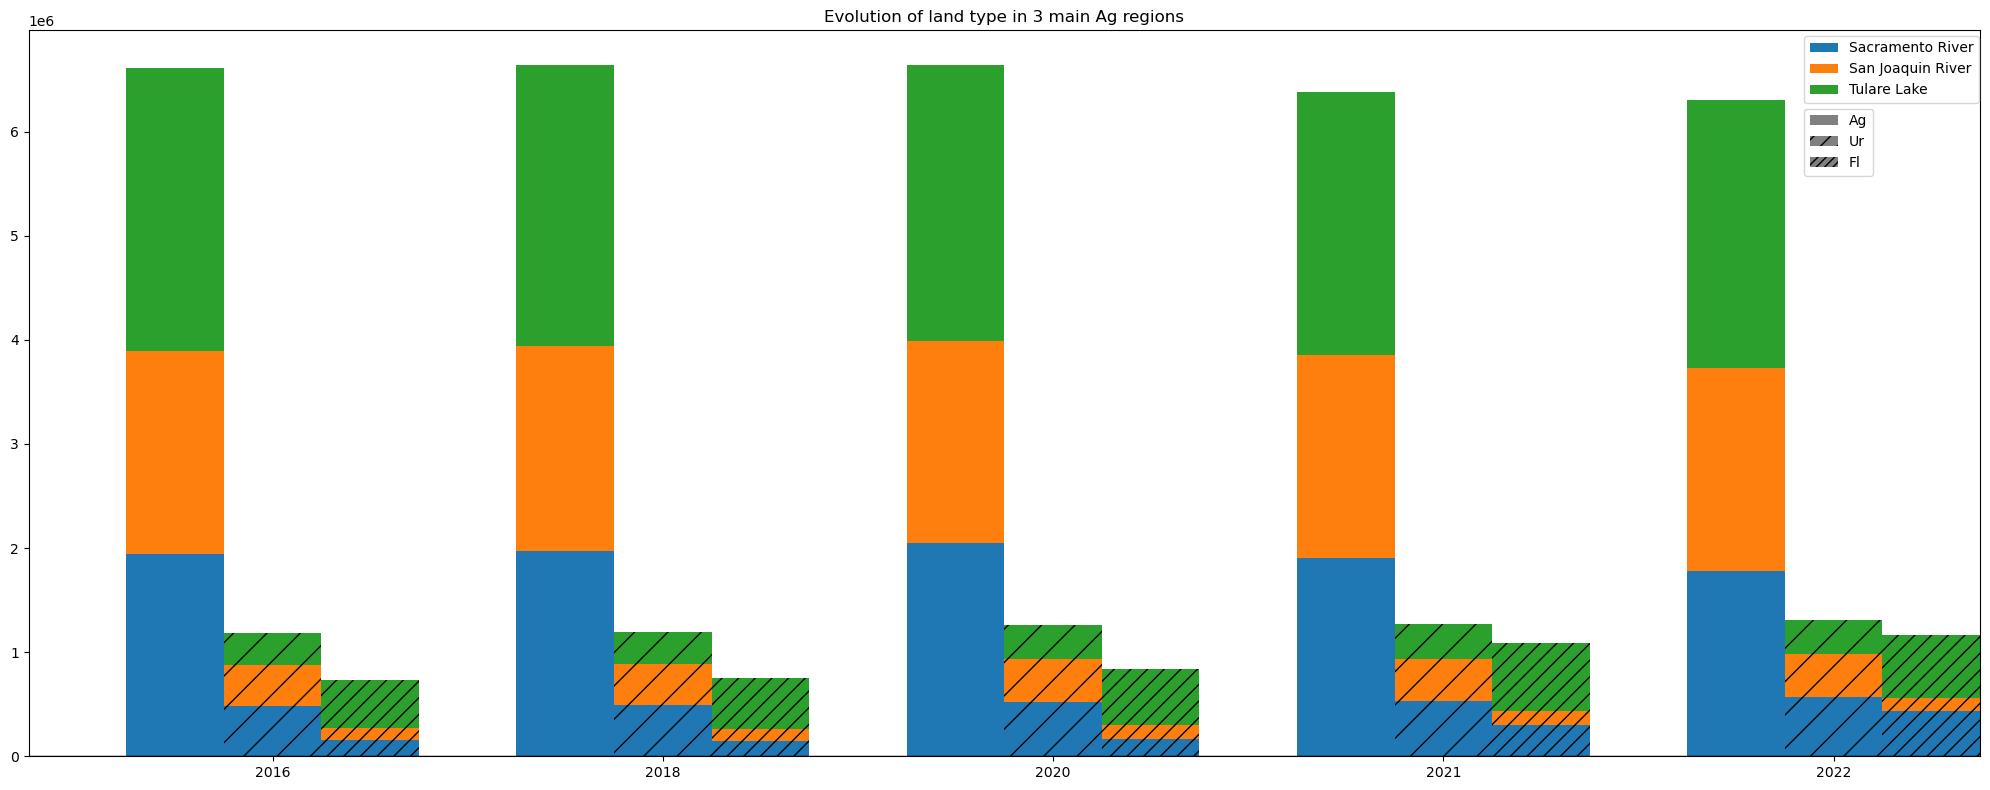

In [60]:
plot_clustered_stacked([meta_df['Agriculture'], meta_df['Urban'], meta_df['Fallow']],["Ag", "Ur", "Fl"], title="Evolution of land type in 3 main Ag regions")
plt.show()

In [61]:
base_year_data = meta_df.loc['2018']
percentage_change_from_2018 = meta_df.sub(base_year_data, axis='columns').divide(base_year_data, axis='columns')*100
percentage_change_from_2018 = percentage_change_from_2018.drop('2018')

relative_change_from_2018 = meta_df.sub(base_year_data, axis='columns')
relative_change_from_2018 = relative_change_from_2018.drop('2018')

In [62]:
percentage_change_from_2018

Land Type      Agriculture                                          Urban  \
Region    Sacramento River San Joaquin River Tulare Lake Sacramento River   
2016             -1.591732         -0.524341    0.641438        -0.926261   
2020              3.557201         -1.126520   -1.692482         6.823578   
2021             -3.325556         -1.026572   -6.406901         7.407341   
2022             -9.788787         -0.926918   -4.566632        15.875750   

Land Type                                         Fallow                    \
Region    San Joaquin River Tulare Lake Sacramento River San Joaquin River   
2016              -0.783468   -2.162198         5.019508         -0.857994   
2020               4.446776    4.975102         9.143561         18.186776   
2021               5.111390    5.562298       101.583810         14.270291   
2022               4.651988    6.074837       189.285851         12.869270   

Land Type              
Region    Tulare Lake  
2016        -5.513852  
2020         9.052945  
2021        33.506621  
2022        22.858883

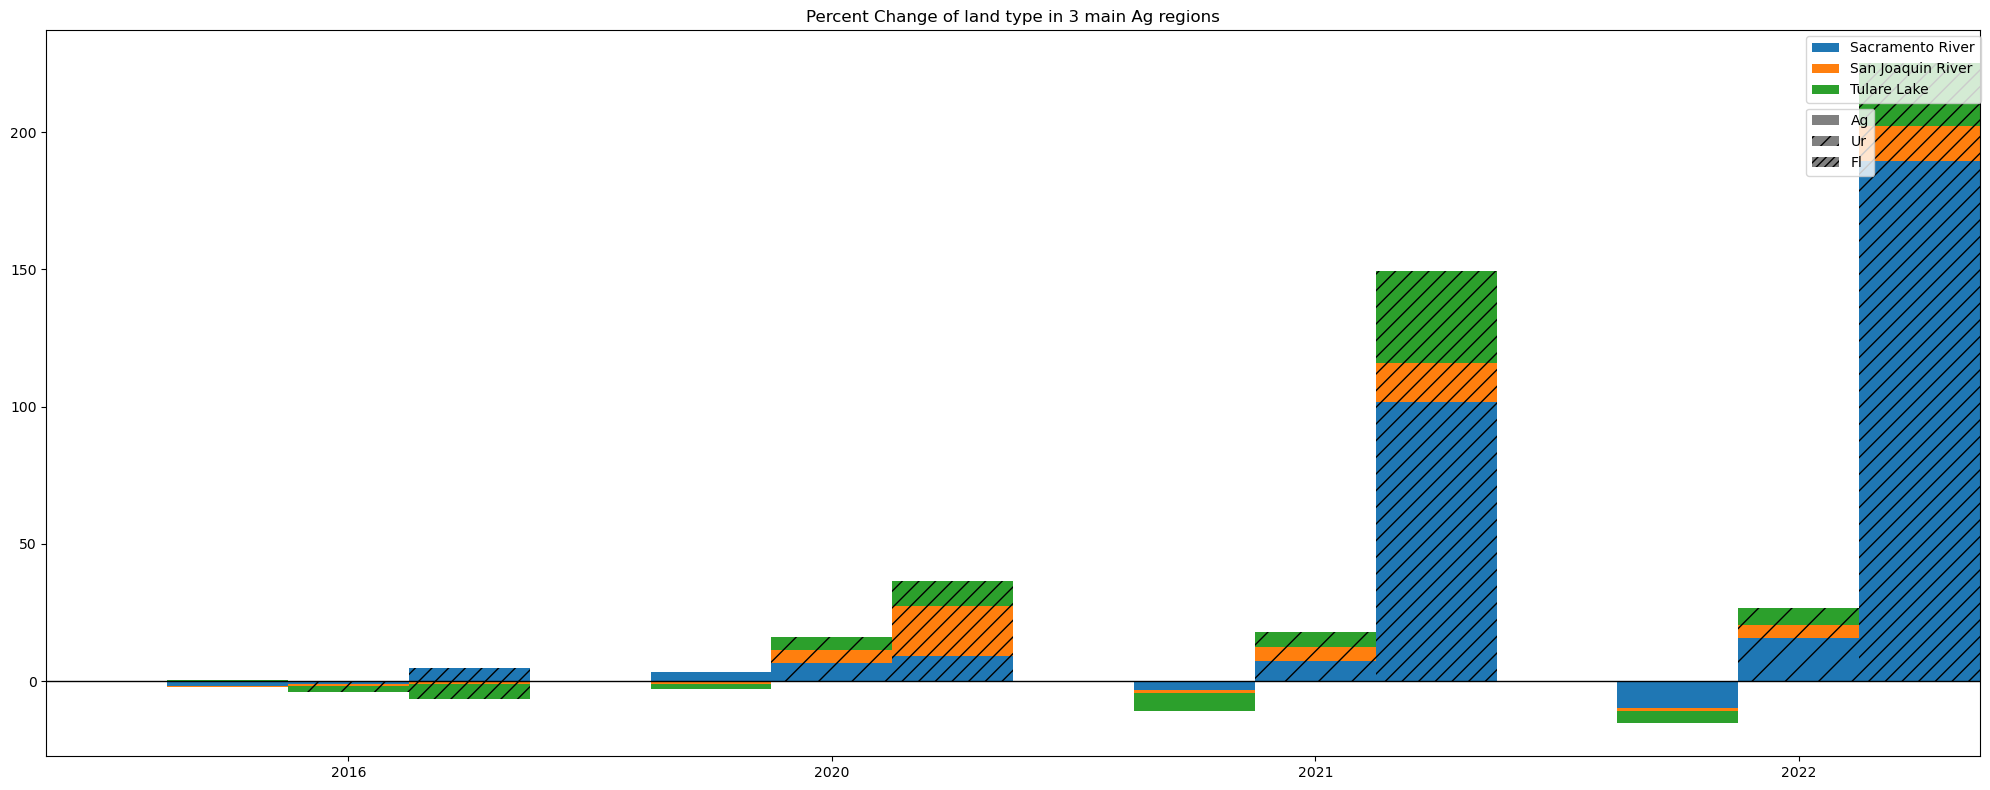

In [63]:
plot_clustered_stacked([percentage_change_from_2018['Agriculture'], percentage_change_from_2018['Urban'], percentage_change_from_2018['Fallow']],["Ag", "Ur", "Fl"], title="Percent Change of land type in 3 main Ag regions")
plt.show()


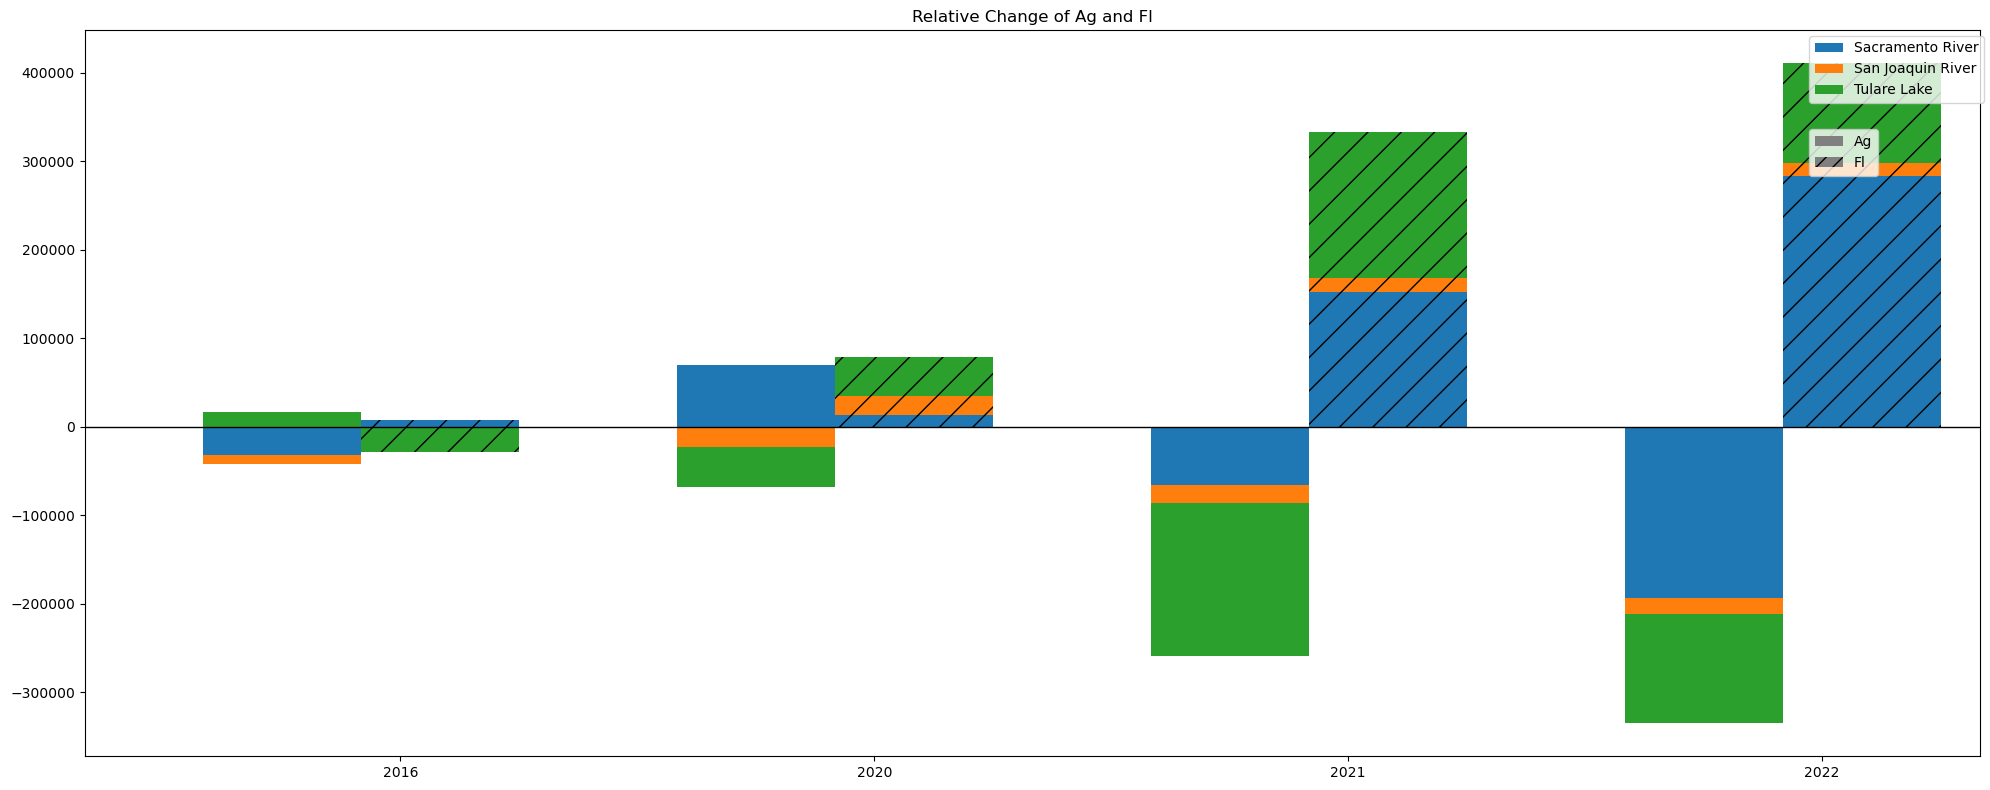

In [64]:
# plot_clustered_stacked([relative_change_from_2018['Agriculture'], relative_change_from_2018['Urban'], relative_change_from_2018['Fallow']],["Ag", "Ur", "Fl"])
plot_clustered_stacked([relative_change_from_2018['Agriculture'], relative_change_from_2018['Fallow']],["Ag", "Fl"], title='Relative Change of Ag and Fl')
plt.show()

In [65]:
# only 3 main hr regions
metadata = pd.read_pickle(r'Data/crop_area_HR.pk')
metadata = metadata[:5] 
for i, data in enumerate(metadata):
    metadata[i] = data.loc[:,['Tulare Lake', 'San Joaquin River', 'Sacramento River']]
    
landiq_2016_crops,landiq_2018_crops,landiq_2020_crops,landiq_2021_crops,landiq_2022_crops=  metadata

In [133]:
landiq_2016_crops,landiq_2018_crops,landiq_2020_crops,landiq_2021_crops,landiq_2022_crops, all_hr_crops= pd.read_pickle(r'Data/crop_area_HR.pk')
meta_df_crops = pd.concat(all_hr_crops, axis=1)
meta_df_crops.columns = meta_df_crops.columns.rename(['Year', 'Region'], level=[0, 1])
melted_df = pd.melt(meta_df_crops,ignore_index=False)
meta_df_crops = melted_df.reset_index(names='Crop Type')
meta_df_crops_pivot = meta_df_crops.pivot_table(index='Year', columns=['Region', 'Crop Type'], values='value',dropna=False)
meta_df_crops_pivot

Region    Central Coast                                           \
Crop Type             C             D            F             G   
Year                                                               
2016       20289.289951  13294.954955  2638.054404  55098.929528   
2018       19714.820030  13318.900940  2567.660540  62571.736380   
2020       19454.285799  13137.927955  4503.540583  54335.976875   
2021       19690.279505  13590.918742  2803.351501  44946.006253   
2022       20497.799796  12953.947093  2825.096046  46899.228340   

Region                                                                  \
Crop Type             P   R              T              V           YP   
Year                                                                     
2016       22384.752950 NaN  278247.288713  127091.251425  1111.059726   
2018       27602.789810 NaN  269247.267080  130775.884560  1619.584680   
2020       20608.613364 NaN  267296.628647  126640.010939  2297.863222   
2021       18610.380793 NaN  265664.906808  123214.713202  2170.133439   
2022       16718.948972 NaN  266725.959901  121651.018326  1971.769314   

Region    Colorado River  ... South Lahontan    Tulare Lake                \
Crop Type              C  ...             YP              C             D   
Year                      ...                                               
2016        28288.056675  ...     407.603094  229142.565562  9.347751e+05   
2018        31333.630310  ...     126.451400  239026.022620  1.056063e+06   
2020        33266.135263  ...       5.187427  252568.067552  1.172432e+06   
2021        31979.150046  ...       4.107353  246996.102688  1.167538e+06   
2022        32471.492112  ...       5.601837  257137.974081  1.216252e+06   

Region                                                                     \
Crop Type              F              G              P   R              T   
Year                                                                        
2016       448653.549731  223282.163229  190178.145981 NaN  249453.673472   
2018       477633.990830  146119.289910  149758.958880 NaN  244009.394610   
2020       396499.987855  147225.093144  143921.834209 NaN  235445.808670   
2021       338240.353163  112271.875203  136627.477161 NaN  212956.335349   
2022       353973.134720  128560.946737  114974.405503 NaN  191238.607791   

Region                                   
Crop Type              V             YP  
Year                                     
2016       338664.252259  103962.901886  
2018       315456.765600   72721.560600  
2020       279598.292019   27387.542252  
2021       265480.156821   47640.941459  
2022       255139.885554   60176.510700  

[5 rows x 90 columns]

In [67]:
meta_df_crops_selected = meta_df_crops.loc[meta_df_crops['Region'].isin(['Tulare Lake', 'San Joaquin River', 'Sacramento River'])]
regional_sum = meta_df_crops_selected.groupby(['Region','Year'])['value'].sum()
regional_sum = regional_sum.reset_index()
regional_sum_pivot = regional_sum.pivot_table(index='Year', columns=['Region'], values='value',dropna=False) 

df = regional_sum_pivot.T
fig = px.bar(df, x=df.index, y=df.columns, title="Temporal Changes in Crop Distribution Across Hydrological Regions", labels={'index': 'Hydrological Region', 'value': 'Crop Quantitiy'}, height=600,barmode='group')
fig.show()

In [68]:
meta_df_crops_selected = meta_df_crops.loc[meta_df_crops['Region'].isin(['Tulare Lake', 'San Joaquin River', 'Sacramento River'])]
# Create the bar plot with color based on DataFrame column
fig = px.bar(meta_df_crops_selected, x='Year', y='value',
             title="Crop Distribution Change in 3 AG Regions",
             labels={'index': 'Crop Type', 'value': 'Quantity'},
             color='Crop Type', 
             height=600, barmode='group')

# Show the plot
fig.show()

In [136]:
meta_df_crops_selected = meta_df_crops.loc[meta_df_crops['Region'].isin(['Tulare Lake', 'San Joaquin River', 'Sacramento River'])]
regional_sum = meta_df_crops_selected.groupby(['Crop Type','Year'])['value'].sum()
regional_sum = regional_sum.reset_index()
regional_sum_pivot = regional_sum.pivot_table(index='Year', columns=['Crop Type'], values='value',dropna=False) 

df = regional_sum_pivot.T
fig = px.bar(df, x=df.index, y=df.columns, title="Temporal Changes in 3 AG Regions Crop Distribution", labels={'index': 'Crop Type', 'value': 'Crop Quantity'}, height=600,barmode='group')
# Save the figure to an HTML file
fig.show()

# the following two are the same

In [70]:
# Pivot the data: rows are 'Year', columns are 'Crop Type', values are 'value'
meta_df_crops_selected = meta_df_crops.loc[meta_df_crops['Region'].isin(['Tulare Lake', 'San Joaquin River', 'Sacramento River'])]
regional_sum = meta_df_crops.groupby(['Crop Type','Year'])['value'].sum()
regional_sum = regional_sum.reset_index()
regional_sum_pivot = regional_sum.pivot_table(index='Year', columns=['Crop Type'], values='value',dropna=False) 
base_year_data = regional_sum_pivot.loc['2018']
percentage_change_from_2018 = regional_sum_pivot.sub(base_year_data, axis='columns').divide(base_year_data, axis='columns')*100    
df = percentage_change_from_2018.T

relative_change_from_2018 = regional_sum_pivot.sub(base_year_data, axis='columns')


In [71]:
df.head()

Year,2016,2018,2020,2021,2022
Crop Type,,,,,
C,-1.573564,0.0,4.534054,3.607844,6.255809
D,-10.452099,0.0,9.206131,10.453156,13.767634
F,-5.945450,0.0,-9.605663,-20.248215,-19.794637
G,1.694020,0.0,-4.144563,-17.539615,-8.612693
P,9.018837,0.0,8.063600,6.955452,4.526101


In [72]:
fig = px.bar(df, x=df.index, y=df.columns, title="Percentage Change in Crop Yields Across Three Agricultural Regions", labels={'index': 'Crop Type', 'value': 'Percent Change'}, height=600,barmode='group')
fig.show()  

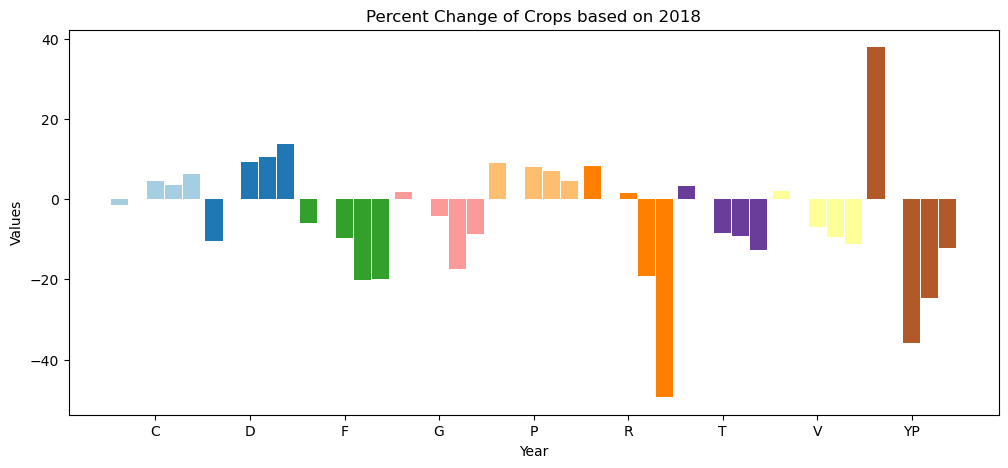

In [73]:
df = percentage_change_from_2018.T
# Define a color map
colors = plt.cm.Paired(np.linspace(0, 1, len(df)))

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
width = 0.18  # Reducing width of the bars
ind = np.arange(len(df))  # the x locations for the groups

# Number of variables and the total width for all bars together
num_vars = len(df.columns)
group_width = num_vars * width  # Total width of grouped bars
spacing = 0.01  # Adding small spaces between bars to distinguish them

# Loop over the columns to create each set of bars
for i, col in enumerate(df.columns):
    # Offset calculation: center the bars around the tick
    offset = (i - (num_vars - 1) / 2) * (width + spacing)
    ax.bar(ind + offset, df[col], width, label=col, color=colors)

# Add some text for labels, title and axes ticks
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Percent Change of Crops based on 2018')
ax.set_xticks(ind)
ax.set_xticklabels(df.index)
# ax.legend(title="Variables", bbox_to_anchor=(0.9, 1), loc='upper left')

plt.show()

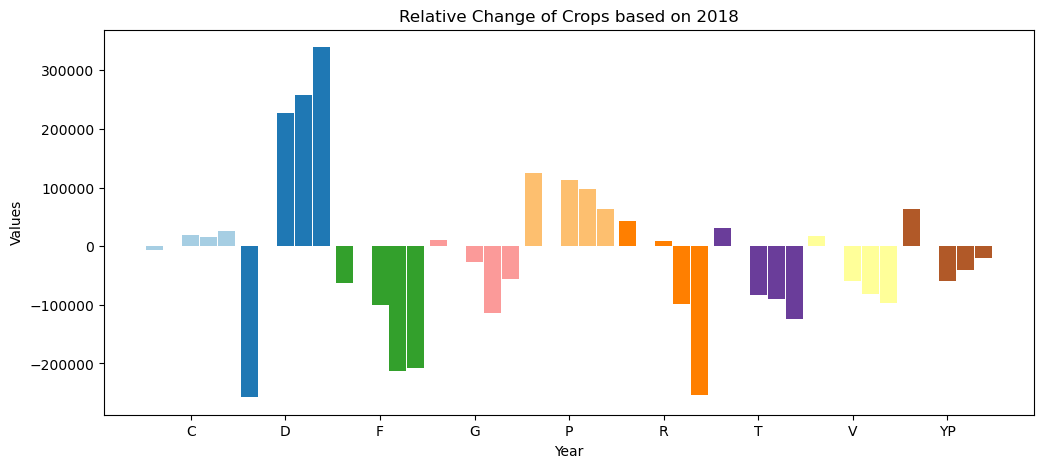

In [74]:
df = relative_change_from_2018.T
# Define a color map
colors = plt.cm.Paired(np.linspace(0, 1, len(df)))

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
width = 0.18  # Reducing width of the bars
ind = np.arange(len(df))  # the x locations for the groups

# Number of variables and the total width for all bars together
num_vars = len(df.columns)
group_width = num_vars * width  # Total width of grouped bars
spacing = 0.01  # Adding small spaces between bars to distinguish them

# Loop over the columns to create each set of bars
for i, col in enumerate(df.columns):
    # Offset calculation: center the bars around the tick
    offset = (i - (num_vars - 1) / 2) * (width + spacing)
    ax.bar(ind + offset, df[col], width, label=col, color=colors)

# Add some text for labels, title and axes ticks
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Relative Change of Crops based on 2018')
ax.set_xticks(ind)
ax.set_xticklabels(df.index)
# ax.legend(title="Variables", bbox_to_anchor=(0.9, 1), loc='upper left')

plt.show()

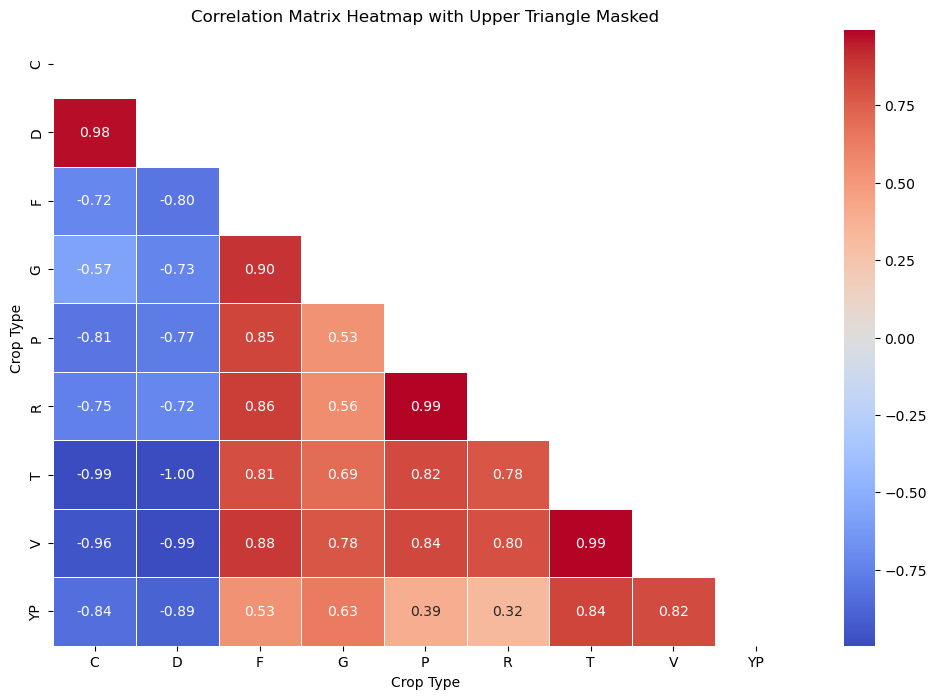

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = percentage_change_from_2018
df = df.drop('2018')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Adjusted heatmap with the mask
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap with Upper Triangle Masked')
plt.show()

# absolute change

In [95]:
base_year_data = regional_sum_pivot.loc['2018']
abs_change_from_2018 = regional_sum_pivot.sub(base_year_data, axis='columns')   

# growth_df = regional_sum_pivot.pct_change().dropna() * 100
growth_df = regional_sum_pivot.diff(axis=0)
growth_df.index = ['14 to 16', '16 to 18','18 to 20','20 to 21','21 to 22']
growth_df

Crop Type,C,D,F,G,P,R,T,V,YP
14 to 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 to 18,6710.042813,257536.420789,62566.293238,-10939.472241,-125369.009609,-43091.140721,-31594.617263,-17047.093216,-62757.873607
18 to 20,19334.264699,226836.167809,-101084.152980,-26764.339469,112090.458743,8531.182149,-82899.247627,-59031.912022,-59470.356193
20 to 21,-3949.577155,30726.311670,-111995.729384,-86501.209132,-15404.138167,-107727.288310,-6378.476209,-21844.466665,18836.226893
21 to 22,11291.543436,81667.694880,4773.170285,57647.369437,-33769.916280,-155311.842982,-34880.303828,-15379.312569,20526.876184


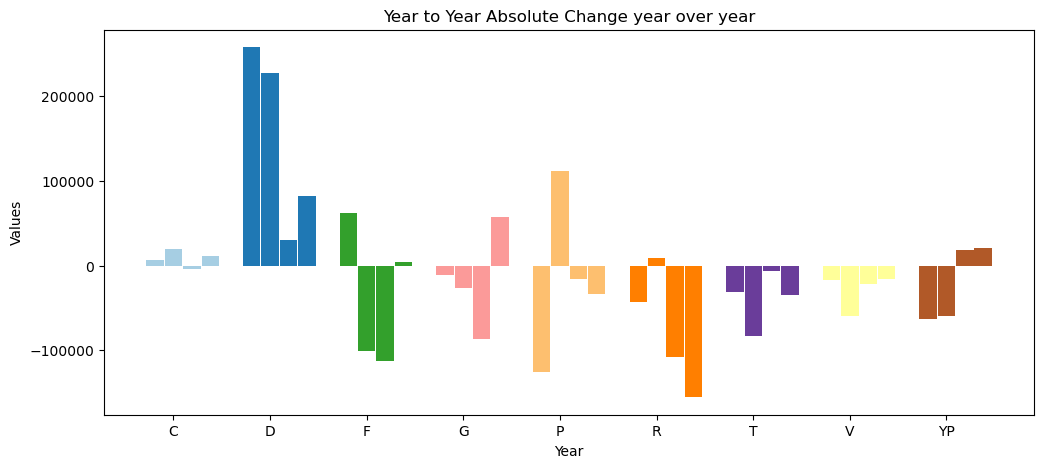

In [96]:
df = growth_df.T

# Define a color map
colors = plt.cm.Paired(np.linspace(0, 1, len(df)))

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
width = 0.18  # Reducing width of the bars
ind = np.arange(len(df))  # the x locations for the groups

# Number of variables and the total width for all bars together
num_vars = len(df.columns)
group_width = num_vars * width  # Total width of grouped bars
spacing = 0.01  # Adding small spaces between bars to distinguish them

# Loop over the columns to create each set of bars
for i, col in enumerate(df.columns):
    # Offset calculation: center the bars around the tick
    offset = (i - (num_vars - 1) / 2) * (width + spacing)
    ax.bar(ind + offset, df[col], width, label=col, color=colors)

# Add some text for labels, title and axes ticks
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Year to Year Absolute Change year over year')
ax.set_xticks(ind)
ax.set_xticklabels(df.index)
# ax.legend(title="Variables", bbox_to_anchor=(0.9, 1), loc='upper left')

plt.show()

In [78]:
fig = px.bar(df, x=df.index, y=df.columns, title="Absolute Change in Crop Yields Across Three Agricultural Regions", labels={'index': 'Crop Type', 'value': 'Absolute Change'}, height=600,barmode='group')
fig.show()  

In [79]:
meta_df_crops_selected = meta_df_crops.loc[meta_df_crops['Region'].isin(['Tulare Lake', 'San Joaquin River', 'Sacramento River'])]
# Create the bar plot with color based on DataFrame column
fig = px.bar(meta_df_crops_selected, x='Crop Type', y='value',
             title="Crop Distribution Change in 3 AG Regions",
             labels={'index': 'Crop Type', 'value': 'Quantity', 'Region': 'Region'},
             color='Year', 
             height=600, barmode='group')

# Show the plot
fig.show()

In [81]:
meta_df_crops

,Crop Type,Year,Region,value
0,C,2016,Tulare Lake,229142.565562
1,D,2016,Tulare Lake,934775.142211
2,F,2016,Tulare Lake,448653.549731
3,G,2016,Tulare Lake,223282.163229
4,P,2016,Tulare Lake,190178.145981
...,...,...,...,...
445,P,2022,South Lahontan,38723.907320
446,T,2022,South Lahontan,3663.880592
447,V,2022,South Lahontan,87.180318
448,YP,2022,South Lahontan,5.601837


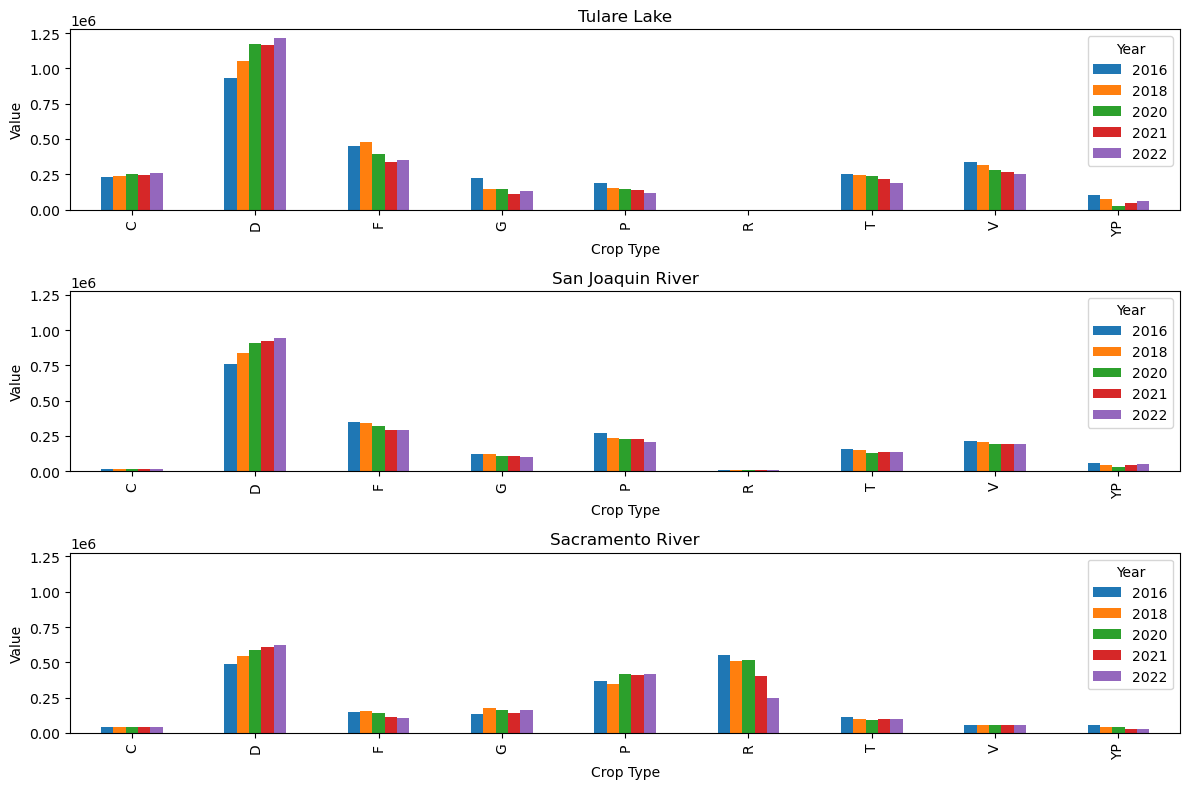

In [82]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharey=True)
axes = axes.flatten()  # Flatten axes array if needed (in this case it's already 1D)

for i, region in enumerate(['Tulare Lake', 'San Joaquin River', 'Sacramento River']):
    selected_df = meta_df_crops[meta_df_crops['Region'] == region]
    selected_df = selected_df.reset_index()
    
    # Create a pivot table where each column is a crop type, rows are years, and values are 'value'
    selected_df_pivot = selected_df.pivot_table(index='Year', columns='Crop Type', values='value', dropna=False)
    selected_df_pivot = selected_df_pivot.T
    # Plotting directly with Matplotlib
    selected_df_pivot.plot(kind='bar', ax=axes[i], legend=True, title=region)
    axes[i].set_ylabel('Value')
    axes[i].legend(title='Year')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [134]:
meta_df_crops = meta_df_crops.loc [meta_df_crops.Year>='2020']

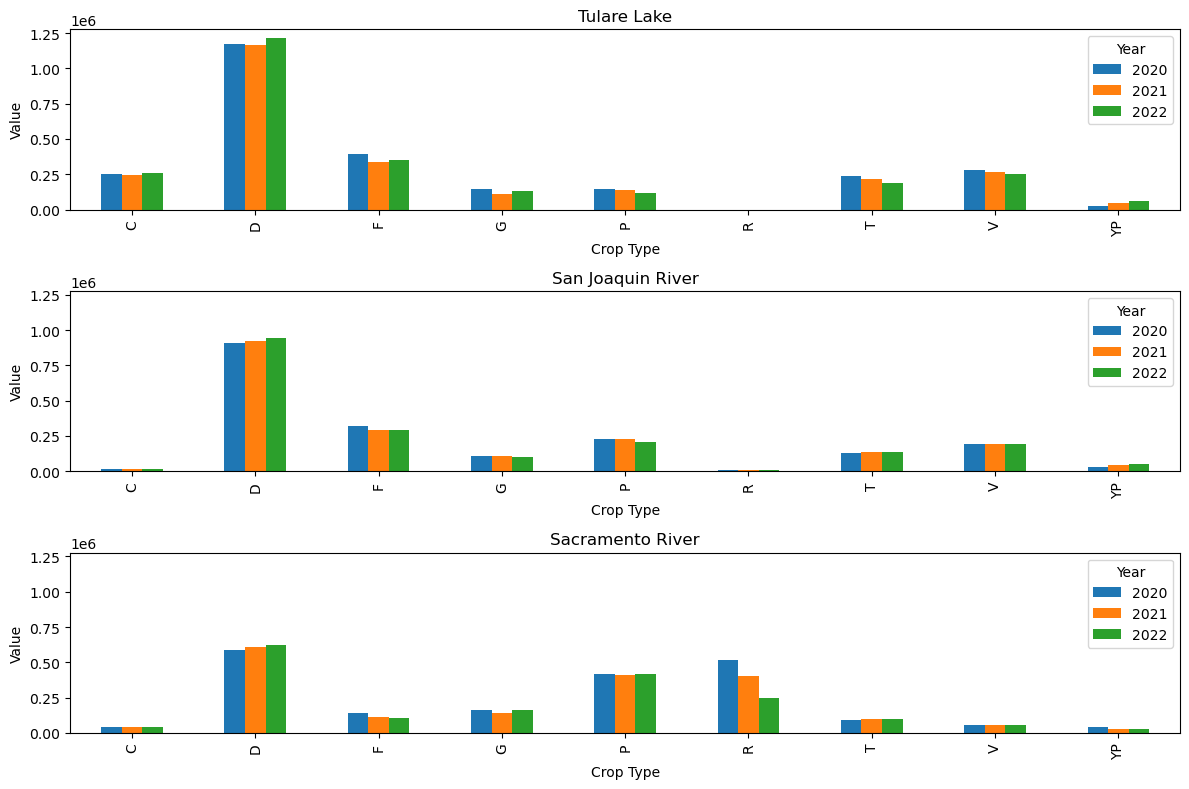

In [135]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharey=True)
axes = axes.flatten()  # Flatten axes array if needed (in this case it's already 1D)

for i, region in enumerate(['Tulare Lake', 'San Joaquin River', 'Sacramento River']):
    selected_df = meta_df_crops[meta_df_crops['Region'] == region]
    selected_df = selected_df.reset_index()
    
    # Create a pivot table where each column is a crop type, rows are years, and values are 'value'
    selected_df_pivot = selected_df.pivot_table(index='Year', columns='Crop Type', values='value', dropna=False)
    selected_df_pivot = selected_df_pivot.T
    # Plotting directly with Matplotlib
    selected_df_pivot.plot(kind='bar', ax=axes[i], legend=True, title=region)
    axes[i].set_ylabel('Value')
    axes[i].legend(title='Year')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [111]:
meta_df_crops = meta_df_crops.loc[meta_df_crops.Year >='2020']

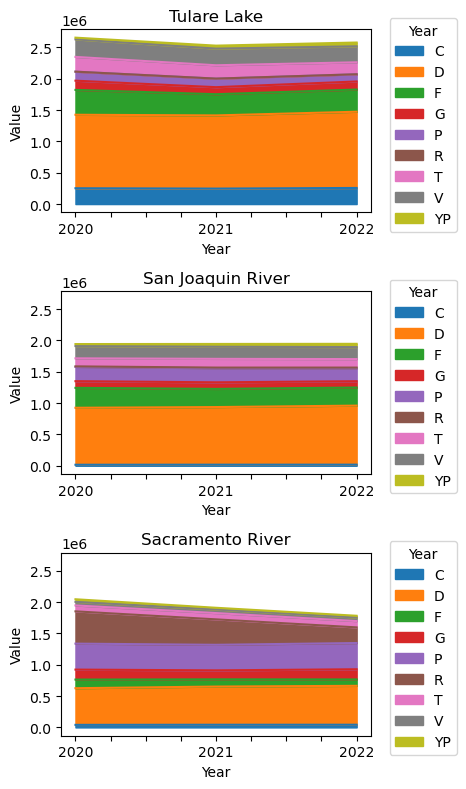

In [129]:
fig, axes = plt.subplots(3, 1, figsize=(5, 8), sharey=True)
axes = axes.flatten()  # Flatten axes array if needed (in this case it's already 1D)

for i, region in enumerate(['Tulare Lake', 'San Joaquin River', 'Sacramento River']):
    selected_df = meta_df_crops[meta_df_crops['Region'] == region]
    selected_df = selected_df.reset_index()
    
    # Create a pivot table where each column is a crop type, rows are years, and values are 'value'
    selected_df_pivot = selected_df.pivot_table(index='Year', columns='Crop Type', values='value', dropna=False)
    # Plotting directly with Matplotlib
    selected_df_pivot.plot.area(ax=axes[i], legend=True, title=region)
    axes[i].set_ylabel('Value')
    axes[i].legend(title='Year', loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [115]:
# Add a new column based on the Crop Type condition
meta_df_crops['New Crop Type'] = meta_df_crops['Crop Type'].apply(lambda x: 'Young Perennial' if x == 'YP' else 'Crops')
meta_df_crops

C:\Users\armen\AppData\Local\Temp\ipykernel_14904\4074117596.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Crop Type,Year,Region,value,New Crop Type
18,C,2020,Tulare Lake,2.525681e+05,Crops
19,D,2020,Tulare Lake,1.172432e+06,Crops
20,F,2020,Tulare Lake,3.965000e+05,Crops
21,G,2020,Tulare Lake,1.472251e+05,Crops
22,P,2020,Tulare Lake,1.439218e+05,Crops
...,...,...,...,...,...
445,P,2022,South Lahontan,3.872391e+04,Crops
446,T,2022,South Lahontan,3.663881e+03,Crops
447,V,2022,South Lahontan,8.718032e+01,Crops
448,YP,2022,South Lahontan,5.601837e+00,Young Perennial


In [118]:
selected_df.head()

,index,Crop Type,Year,Region,value,New Crop Type
0,153,C,2020,Sacramento River,40466.887770,Crops
1,154,D,2020,Sacramento River,585110.400939,Crops
2,155,F,2020,Sacramento River,137556.704559,Crops
3,156,G,2020,Sacramento River,159292.722938,Crops
4,157,P,2020,Sacramento River,414146.586560,Crops


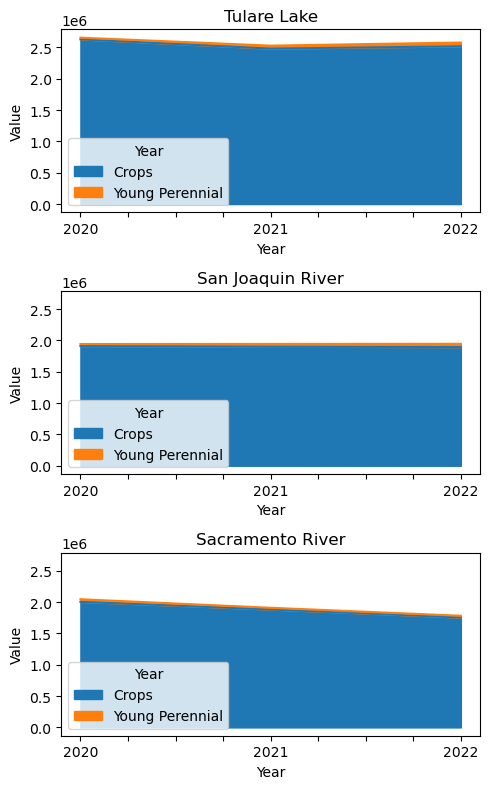

In [122]:
fig, axes = plt.subplots(3, 1, figsize=(5, 8), sharey=True)
axes = axes.flatten()  # Flatten axes array if needed (in this case it's already 1D)

for i, region in enumerate(['Tulare Lake', 'San Joaquin River', 'Sacramento River']):
    selected_df = meta_df_crops[meta_df_crops['Region'] == region]
    selected_df = selected_df.reset_index()
    
    # Create a pivot table where each column is a crop type, rows are years, and values are 'value'
    selected_df_pivot = selected_df.pivot_table(index='Year', columns='New Crop Type', values='value', aggfunc='sum', dropna=False)
    # Plotting directly with Matplotlib
    # plt.stackplot(x = selected_df['Year'],y,ax=axes[i], legend=True, title=region)
    selected_df_pivot.plot.area(ax=axes[i], legend=True, title=region)
    axes[i].set_ylabel('Value')
    axes[i].legend(title='Year')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()